In [1]:
# ich brauche immer 3 Teile in Keras
from keras.models import Sequential # initial sequential NN 
from keras.layers import Dense      # hidden layer
from keras.optimizers import SGD    # optimierer ist stochastic gradient descent
import numpy as np
import statsmodels.api as sm    # ich brauch das für OLS Schätzung
from sklearn.metrics import mean_squared_error,log_loss # zur model Evalutaion nehme ich Mean squared error and log_loss (definiert als likelihood multinomial modell)
import matplotlib.pyplot as plt

/Applications/Anaconda/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Applications/Anaconda/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Applications/Anaconda/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Applications/Anaconda/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Applications/Anaconda/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: 

In [2]:
# Simulation of some data
np.random.seed (245)
nobs =10000
x1 = 2 * np.random.rand(nobs , 1)
x2 = np.random.uniform(size=nobs).reshape((nobs ,1))
y = -0.5 + 2 * x1 - 3*x2 + np.random.normal(loc=0, scale=1, size=nobs).reshape((nobs ,1)) # last one ist fehler term, weil ich OLS schätzen möchte
X = np.c_[np.ones((nobs ,1)),x1,x2] #zusammenfassen zu einer Vektor
OLS=sm.OLS(y,X).fit()
y_pred_OLS=OLS.predict(X)

In [3]:
X[:,0:5] # erste Spalte in X immer 1

array([[1.        , 1.81370773, 0.77579057],
       [1.        , 0.22506001, 0.28782192],
       [1.        , 0.20060026, 0.4393781 ],
       ...,
       [1.        , 0.97487135, 0.30835699],
       [1.        , 0.03773621, 0.19634294],
       [1.        , 0.04727057, 0.42982725]])

In [4]:
y[:,0:5]

array([[ 1.1677022 ],
       [ 0.04029046],
       [-1.12111839],
       ...,
       [ 0.85713025],
       [-1.55088467],
       [-1.5558517 ]])

## OLS Regression

In [5]:
print(OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                 1.029e+04
Date:                Thu, 05 Dec 2019   Prob (F-statistic):               0.00
Time:                        13:40:45   Log-Likelihood:                -14241.
No. Observations:               10000   AIC:                         2.849e+04
Df Residuals:                    9997   BIC:                         2.851e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5258      0.027    -19.784      0.0

## The Neural Network

### Hyper parameters, die ich brauch für mein NN

In [6]:
#Learningrate ist der zentralen Hyperparameter wichtige 
LR=0.05


# Number of neurons-> hier gemient Output Neuron
Neuron=1


#The Activation function von output layer-> ich habe direkte Zusammenhang zwischen x und y -> hier habe keine Transofrmation (keine Sigmoid oder tanh-> a=z=W*x+b)
Activate='linear'


#The Optimizer stochastic gradient descent -> und gebe ich ihm der Learning rate
Optimizer= SGD(lr=LR)


# The loss function - Verlustfunktion ist schon definiert in keras
loss='mean_squared_error'

### Construct the Neural Network

In [7]:
## Neural Network
from tensorflow import set_random_seed
set_random_seed (245) # wichtig weil Anfang Gewichte in jedes mal gleich sein wird - NN hängt stark an Start von Zufalssgenertor -> welche Anfang Gewichte wird gewählt

#Initialize the ANN - wichtig durch model_ANN zu initialisieren
model_ANN= Sequential() # wir definieren unser NN - ich kann hier auch Layers direkt und Name übergeben! - implizit nur input Layer

#Output Layer definieren zusätzliche Layer
model_ANN.add(Dense(Neuron, activation=Activate, input_shape=(3,),use_bias=False)) # ein neuron, Aktivierungsfunktion='linear' look above! ,input_shape wie mein matrix X definiert ist, use_bias kein bias neuron
model_ANN.summary()




_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [9]:
# ich habe ein layer dense_1
# ich habe shape
# ich habe number of Parameter -> sind die Gewichte, die ich durch NN optimieren will!

### Compile the Neural Network

In [10]:
model_ANN.compile(optimizer=Optimizer , loss=loss) # jetzt müssen wir NN kompilieren -> also in TensorFlow zu übersetze
# optimierer ist stochastic gradient descent, and loss ist mean squared error

### Fit the Neural Network

In [11]:
#Fit the model - unsere NN traninieren -> 
history_ANN=model_ANN.fit(
X, # training data
y, # training targets
epochs=50,verbose=1) # sage ich wie viele epochen (kann auch als Hyperparameter) -> 
# für jedes Gewicht machen wir 50 Update-Steps!, damit mein NN fertig trainiert bzw. auf Daten gelernt/angepasst)
# -> dann schauen wir dass relativ nah an OLS (weil Aktivierungsfunktion Linear!)




Epoch 1/50
10000/10000 [==============================] - 2s 191us/step - loss: 1.2417
Epoch 2/50
10000/10000 [==============================] - 0s 47us/step - loss: 1.0163
Epoch 3/50
10000/10000 [==============================] - 0s 47us/step - loss: 1.0159
Epoch 4/50
10000/10000 [==============================] - 0s 47us/step - loss: 1.0144
Epoch 5/50
10000/10000 [==============================] - 0s 47us/step - loss: 1.0157
Epoch 6/50
10000/10000 [==============================] - 0s 47us/step - loss: 1.0165
Epoch 7/50
10000/10000 [==============================] - 0s 48us/step - loss: 1.0163
Epoch 8/50
10000/10000 [==============================] - 0s 48us/step - loss: 1.0138
Epoch 9/50
10000/10000 [==============================] - 1s 51us/step - loss: 1.0149
Epoch 10/50
10000/10000 [==============================] - 1s 59us/step - loss: 1.0159
Epoch 11/50
10000/10000 [==============================] - 1s 54us/step - loss: 1.0166
Epoch 12/50
10000/10000 [========================

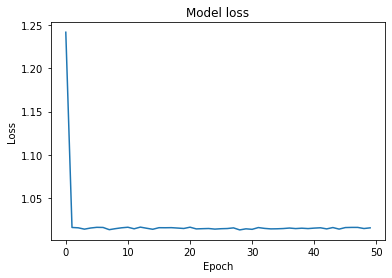

In [12]:
# model loss die ich versuche zu minimieren 
plt.plot(history_ANN.history['loss'])
#plt.plot(history_ANN.history['val_acc'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
#plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# nach einem Step/Epoch kann mann sehen dass Loss realtiv gut minimiert!

In [18]:
# man kann sich dann Inforamtionen aus gfitten Layer ausgeben lassen
model_ANN.layers[0]                # hier bekomme ich die Anzahl der Layers insgesamt    
model_ANN.layers[0].get_weights()  # hier bekomme ich Gewichte, die Input-Layer mit Output-Layer verbinden! -> diese Gewicht sind nicht anders als Betas in OLS, weil mein NN wie OLS strukturiert hat!

[array([[-0.52725685],
        [ 1.971427  ],
        [-2.964658  ]], dtype=float32)]

In [13]:
#Estimated Weights 
print('const',model_ANN.layers[0]. get_weights ()[0][0])
print('Beta1',model_ANN.layers[0]. get_weights ()[0][1])
print('Beta1',model_ANN.layers[0]. get_weights ()[0][2])

const [-0.52725685]
Beta1 [1.971427]
Beta1 [-2.964658]


In [19]:
OLS.params # hier bekomme ich OLS Betas -> sind wie NN Gewichte, weil mein NN wie OLS strukturiert!

array([-0.52578554,  2.00410969, -2.96424973])

In [20]:
#Evaluate the fit
y_pred_ANN=model_ANN.predict(X)
print("MSE ANN:", mean_squared_error(np.ravel(y), np.ravel(y_pred_ANN )))
print("MSE OLS:", mean_squared_error(np.ravel(y), np.ravel(y_pred_OLS )))

MSE ANN: 1.011894178649231
MSE OLS: 1.0103468380802312


## Logistic Regression

In [21]:
#Simulate some data
np.random.seed(245)
nobs=10000
mean = np.zeros(2)
cov = np.eye(2)
X=np.random.multivariate_normal(mean,cov,nobs)
X=sm.add_constant(X)

y_star= X.T[0]+ 5*X.T[1]+ 4*X.T[2] + np.random.logistic(size=nobs) # y*

y=np.where(y_star>0,1,0) #wenn y* über Null dann y=1 sonst y=0

In [22]:
y_star[0:5]

array([ 4.33539705, -2.14916892,  0.1318647 ,  5.88800974,  0.15844443])

In [18]:
y[0:5] # the first y* is 4.33539075 > 0 -> y = 1


array([1, 0, 1, 1, 1])

In [23]:
Logit_fit=sm.Logit(y, X).fit()
print(Logit_fit.summary())

Optimization terminated successfully.
         Current function value: 0.191293
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9997
Method:                           MLE   Df Model:                            2
Date:                Thu, 05 Dec 2019   Pseudo R-squ.:                  0.7216
Time:                        15:20:01   Log-Likelihood:                -1912.9
converged:                       True   LL-Null:                       -6872.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9896      0.047     21.074      0.000       0.898       1.082
x1             5.1413      0.

### Hyper Parameters - jetzt Netz an sich bleibt gleich aber ich brauche andere Aktivierungsfunktion, weil Logit model y=funktion(x*Beta) -> deswegen wird in dem Neuron sigmoid als Aktivierungsfunktion verwendet!

In [25]:
#Learningrate
LR=0.05


# Number of neurons
Neuron=1


#The Activation function
Activate='sigmoid' #aka logistic link -> ich bekomme zuerst Wahrschienlichkeit, diese Wahr. würde durch logistische Funktion(=sigmoid) zu 1 oder 0 transformiert!


#The Optimizer
Optimizer= SGD(lr=LR)


# The loss function
loss='binary_crossentropy' # aka binary_crossentropy ist nicht anders als negative log likelihood in the logit model-> wenn ich negative log likelihood minimiere dann maximiere ich im Endeffekt die Likelihood

### Construct the Neural Network

In [26]:
## Neural Network
from tensorflow import set_random_seed
set_random_seed (245)

#Initialize the ANN
model_Logit= Sequential()

#Output Layer
model_Logit.add(Dense(Neuron, activation=Activate, input_shape=(3,),use_bias=False))
model_Logit.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


### Compile the Neural Network

In [27]:
model_Logit.compile(optimizer=Optimizer , loss=loss)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


### Fit the Neural Network

In [28]:
#Fit the model
history_Logit=model_Logit.fit(
X, # training data
y, # training targets
epochs=50,verbose=1)

Epoch 1/50
10000/10000 [==============================] - 2s 221us/step - loss: 0.3692
Epoch 2/50
10000/10000 [==============================] - 1s 77us/step - loss: 0.2542
Epoch 3/50
10000/10000 [==============================] - 1s 77us/step - loss: 0.2297
Epoch 4/50
10000/10000 [==============================] - 1s 78us/step - loss: 0.2179
Epoch 5/50
10000/10000 [==============================] - 1s 76us/step - loss: 0.2109
Epoch 6/50
10000/10000 [==============================] - 1s 87us/step - loss: 0.2063
Epoch 7/50
10000/10000 [==============================] - 1s 86us/step - loss: 0.2031
Epoch 8/50
10000/10000 [==============================] - 1s 81us/step - loss: 0.2007
Epoch 9/50
10000/10000 [==============================] - 1s 81us/step - loss: 0.1990
Epoch 10/50
10000/10000 [==============================] - 1s 78us/step - loss: 0.1976
Epoch 11/50
10000/10000 [==============================] - 1s 87us/step - loss: 0.1966
Epoch 12/50
10000/10000 [==========================

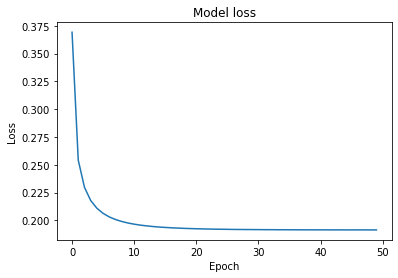

In [33]:
plt.plot(history_Logit.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

In [38]:
# man kann sich dann Inforamtionen aus gfitten Layer ausgeben lassen
model_Logit.layers[0]                # hier bekomme ich die Anzahl der Layers insgesamt    
model_Logit.layers[0].get_weights()  # hier bekomme ich Gewichte, die Input-Layer mit Output-Layer verbinden! -> diese Gewicht sind nicht anders als Betas in Logit, weil mein NN wie Logit strukturiert hat!

[array([[0.96776724],
        [5.046778  ],
        [4.170388  ]], dtype=float32)]

In [39]:
#Estimated Weights
print('const',model_Logit.layers[0]. get_weights ()[0][0])
print('Beta1',model_Logit.layers[0]. get_weights ()[0][1])
print('Beta1',model_Logit.layers[0]. get_weights ()[0][2])

const [0.96776724]
Beta1 [5.046778]
Beta1 [4.170388]


In [40]:
#Evaluate the fit
y_pred_ANN_Logit=model_Logit.predict_proba(X)
y_pred_Logit=Logit_fit.predict(X)
print("MSE ANN  :", log_loss(np.ravel(y), np.ravel(y_pred_ANN_Logit),eps=0.001))
print("MSE Logit:", log_loss(np.ravel(y), np.ravel(y_pred_Logit)))

MSE ANN  : 0.19156017505611525
MSE Logit: 0.19129313542069695
